In [1]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import control

#  Espacio de estados

Hasta el momento se han analizado sistemas lineales e invariantes en el tiempo, de una entrada y una salida en el dominio de la frecuencia. La representación en espacio de estados permite modelar y analizar sistemas con múltiples entradas y salidas, tanto para sistemas lineales como no lineales.

Un modelo en espacio de estados de un sistema físico describe relaciones entre entradas, salidas y variables de estado relacionadas por ecuaciones diferenciales de orden $n$ en el dominio del tiempo. Estas ecuaciones se compactan en una ecuación diferencial matricial de primer orden. Las variables de entradas, salidas y estados son expresadas como vectores, y si es un sistema LTI, las ecuaciones se escriben matricialmente. 



La función de transferencia de un sistema cuya entrada es una señal $u$ y cuya salida es $y$ de un sistema corresponde a $\frac{U(s)}{y(s)}$.

Su representación en espacio de estados se muestra en el siguiente diagrama.

![EspacioEstados](figuras/EspacioEstadosDiagrama.png)

- La entrada $u$ puede tener un efecto directo sobre la salida a través de $D$.
- $X$ es un vector de señales internas del sistema.
- $\dot{X}$ es el vector de derivadas de $X$.
- $u$ altera la derivada de $X$ a través de $B$.
- $X$ realimenta a sus derivadas a través de $A$.
- $X$ envía información desde el estado hacia la salida $y$ a través de $C$.

$$\dot{X} = A \cdot X + B \cdot u $$
$$y =  C \cdot X +  D \cdot u $$

- **Estado**: Los valores que toma, en un instante determinado, un conjunto de variables a partir de cuál se define el comportamiento de un sistema.
- **Variables de estado**: Las variables que determinan el estado de un sistema dinámico. Las variables de estado no necesitan ser físicamente medibles (observables) pero es recomendable que lo sean.
- **Vector de estado**: El compuesto por todas las variables de estado.
- **Espacio de estados**: Un espacio compuesto por las variables de estado.
- **Ecuaciones de estado**: Las relaciones entre los estados y las entradas.

**Ejemplo**

Considere un sistema físico de entrada $u(t)$ y salida $y(t)$ que es modelado por la siguiente ecuación diferencial:

$$m \frac{d^2y}{dt^2} + b \frac{dy}{dt} + k y(t) = u(t)$$


$$s^2mY(s) + bsY(s) + kY(s) = U(s)$$

$$(s^2m + bs + k )Y(s) = U(s)$$

$$\frac{Y(s)}{U(s)} = \frac{1}{s^2m + bs + k}$$

Como el sistema es de orden 2, se define un vector de estados en 2 dimensiones.

$$x = \left [ \matrix{x_1 \\ x_2} \right ]  $$

Se escogen las variables de estado:

\begin{align}
x_1(t) &= y(t) \\
x_2(t) &= \frac{dy}{dt} = \dot{y}(t)
\end{align}

De donde se desprende que:
\begin{align}
\dot{x}_1(t) &= \frac{dy}{dt} = x_2(t) \\
\dot{x}_2(t) &= \frac{d^2y}{dt^2} \\ 
&=  \frac{1}{m}\left ( -b\frac{dy}{dt} - ky(t) + u(t)\right ) \\
&=  \frac{1}{m}\left ( -b x_2(t) - k x_1(t) + u(t)\right ) \\
&=  - \frac{k}{m} x_1(t) - \frac{b}{m} x_2(t) + \frac{1}{m}u(t)
\end{align}


Además, la ecuación de salida es:

$$y(t) = x_1(t)$$

Estas ecuaciones se pueden representar vectorialmente como:

\begin{align}
\dot{x}_1(t) &= \left [ \matrix{0 & 1} \right ] \cdot \left [ \matrix{x_1 \\ x_2} \right ]  \\
\dot{x}_2(t) &=  \left [ \matrix{-\frac{k}{m} & -\frac{b}{m}} \right ] \cdot \left [ \matrix{x_1 \\ x_2} \right ]  + \frac{1}{m}u\\
y(t) &= x_1(t)
\end{align}

O matricialmente como:

$$ \left [ \matrix{\dot{x}_1 \\ \dot{x}_2} \right ] = \left [ \matrix{ 0 & 1 \\ -\frac{k}{m} & -\frac{b}{m} } \right ]  \left [ \matrix{x_1 \\ x_2} \right ] + \left [ \matrix{0 \\ \frac{1}{m} } \right ]u$$ 

$$y = \left [ \matrix{1 & 0} \right ] \left [ \matrix{x_1 \\ x_2} \right ]$$

Dada la forma estándar de los modelos en espacio de estados,

$$\dot{X} = A \cdot X + B \cdot u $$
$$y =  C \cdot X +  D \cdot u $$

Se tiene que:

$$A = \left [ \matrix{ 0 & 1 \\ -\frac{k}{m} & -\frac{b}{m} } \right ], \; 
B = \left [ \matrix{0 \\ \frac{1}{m} } \right ], \;
C = \left [ \matrix{1 & 0} \right ], \;
D = 0$$

## El modelo analizado como función de transferencia

Teniendo en cuenta condiciones iniciales iguales a cero, se aplica la transformada de Laplace.

$$sX(s) = A \cdot X(s) + B \cdot U(s) $$
$$Y(S) =  C \cdot X(s) +  D \cdot U(s) $$




Operando la ecuación de estados:

$$sX(s) - A \cdot X(s) = B \cdot U(s) $$

o

$$\left ( sI - A \right ) X(s) = B \cdot U(s) $$

$$ X(s) = \left ( sI - A \right )^{-1} B \cdot U(s) $$


Incorporando la ecuación de estados en la de salida,

$$Y(S) =  C \cdot \left ( sI - A \right )^{-1} B \cdot U(s)  +  D \cdot U(s)$$

$$Y(S) =  \left ( C \cdot \left ( sI - A \right )^{-1} B  +  D \right ) \cdot U(s)$$

La función de transferencia en términos de las matrices del modelo en espacio de estados es:

$$\frac{Y(S)}{U(s)} = G(s)=  C \cdot \left ( sI - A \right )^{-1} B  +  D $$

Cuando el sistema tiene múltiples entradas y múltiples salidas, se obtiene una matriz de transferencia.

In [2]:
k,m,b,t = sym.symbols(['k','m','b','t'],real = True,positive = True)
s = sym.symbols('s',complex = True)

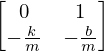

In [3]:
A = Matrix([[0,1],[-k/m,-b/m]])
A

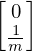

In [4]:
B = Matrix([[0],[1/m]])
B

In [5]:
C = Matrix([[1,0]])
C

In [6]:
D = Matrix([[0]])
D

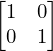

In [7]:
I =  Matrix([[1,0],[0,1]])
I

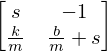

In [8]:
s*I-A

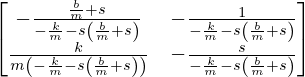

In [9]:
INV=(s*I-A).inv()
INV

Encuentre la función de transferencia $G(s)$

$$\frac{Y(S)}{U(s)} = G(s)=  C \cdot \left ( sI - A \right )^{-1} B  +  D $$

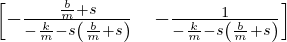

In [10]:
C*INV

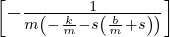

In [11]:
C*INV*B

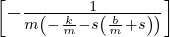

In [13]:
GS

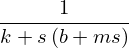

In [12]:
GS = C*INV*B+D
GS[0,0].simplify()

$$\frac{Y(s)}{U(s)} = \frac{1}{s^2m + bs + k}$$

## Representación de un modelo dinámico

Con la notación matricial analizada puede llevarse una ecuación diferencial de orden $n$ mediante una ecuación matricial de orden 1.


Considere un sistema de entrada $u(t)$ y salida $y(t)$ que se modela según la siguiente ecuación diferencial.


$$a_0y(t)+a_1\frac{dy}{dt}+a_2\frac{d^2y}{dt^2}+\cdots+a_n\frac{d^ny}{dt^n} = u(t)$$

$$a_0y(t) = -a_1\frac{dy}{dt}-a_2\frac{d^2y}{dt^2}-\cdots-a_{n-1}\frac{d^{n-1}y}{dt^{n-1}}-a_n\frac{d^ny}{dt^n} + u(t)$$

$$a_n\frac{d^ny}{dt^n} = -a_0y(t) -a_1\frac{dy}{dt} -a_2\frac{d^2y}{dt^2}-\cdots-a_{n-1}\frac{d^{n-1}y}{dt^{n-1}} +u(t)$$


Se definen las variables de estado:

\begin{align}
x_1 &= y \\
x_2 &= \frac{dy}{dt} \\
x_3 &= \frac{d^2y}{dt^2} \\
\cdots &= \cdots \\
x_n &= \frac{d^{n-1}y}{dt^{n-1}} \\
\end{align}

La ecuación diferencial puede reescribirse como:

\begin{align}
\dot{x}_1 &= \frac{dy}{dt} = x_2 \\
\dot{x}_2 &= \frac{d^2y}{dt^2} = x_3 \\
\dot{x}_3 &= \frac{d^3y}{dt^3} = x_4 \\
&\vdots\\
\dot{x}_{n-1} &= \frac{d^{n-1}y}{dt^{n-1}} =  x_{n}  \\
\dot{x}_n &= -\frac{a_0}{a_n}x_1 -\frac{a_1}{a_n}x_2 -\frac{a_2}{a_n}x_3 -\dots -\frac{a_{n-2}}{a_{n}}x_{n-1}  -\frac{a_{n-1}}{a_{n}}x_{n}  + \frac{1}{a_{n}}u
\end{align}

Matricialmente se representa la ecuación de estados:

$$ \left[\matrix{ 
\dot{x}_1 \\ \dot{x}_2 \\ \dot{x}_3 \\ \vdots \\ \dot{x}_{n-1} \\ \dot{x}_n } 
\right ] = 
\left [ \matrix{ 
0 & 1 & 0 & 0 & \dots & 0 & 0 \\ 
0 & 0 & 1 & 0 & \dots & 0 & 0 \\
0 & 0 & 0 & 1 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \dots & 0 & 1 \\
-\frac{a_{0}}{a_{n}} & -\frac{a_{1}}{a_{n}} & -\frac{a_{2}}{a_{n}} & -\frac{a_{3}}{a_{n}} & \dots & -\frac{a_{n-2}}{a_{n}} & -\frac{a_{n-1}}{a_{n}} \\
} \right ]  
\left [ \matrix{x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_{n-1} \\x_n} 
\right ]
+
\left [ \matrix{0 \\ 0 \\ 0 \\ \vdots \\ 0 \\ \frac{1}{a_{n}} } \right ]u$$ 

Y la ecuación de salida:

$$y = \left [ \matrix{1 & 0 & 0 \dots & 0 & 0} \right ] 
\left [ \matrix{x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_{n-1} \\x_n} 
\right ]$$

El modelo en espacio de estados es:

$$\dot{X} = A \cdot X + B \cdot u $$
$$y =  C \cdot X +  D \cdot u $$

donde

$$A = \left [ \matrix{ 
0 & 1 & 0 & 0 & \dots & 0 & 0 \\ 
0 & 0 & 1 & 0 & \dots & 0 & 0 \\
0 & 0 & 0 & 1 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \dots & 0 & 1 \\
-\frac{a_{0}}{a_{n}} & -\frac{a_{1}}{a_{n}} & -\frac{a_{2}}{a_{n}} & -\frac{a_{3}}{a_{n}} & \dots & -\frac{a_{n-2}}{a_{n}} & -\frac{a_{n-1}}{a_{n}} \\
} \right ]  $$

$$ B = \left [ \matrix{0 \\ 0 \\ 0 \\ \vdots \\ 0 \\ \frac{1}{a_{n}} } \right ] $$

$$ C = \left [ \matrix{1 & 0 & 0 \dots & 0 & 0} \right ] $$

$$ D = \left [ \matrix{0} \right ] $$

## Valores propios de la matriz A

La función de transferencia en términos de las matrices del modelo en espacio de estados es:

$$\frac{Y(S)}{U(s)} = G(s)=  C \cdot \left ( sI - A \right )^{-1} B  +  D $$

Observe el papel que tiene el término $sI - A$. El operador de inversión aporta el polinomio denominador, es decir, define los polos del sistema. Así, los valores propios de la matriz $A$ son las raíces de la ecuación característica del sistema.

Considere un sistema cuya matriz de transición A es:

$$A = \left [ \matrix{0&1&0\\0&0&1\\-6&-11&-6} \right ]$$

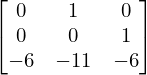

In [14]:
A = Matrix([[0,1,0],[0,0,1],[-6,-11,-6]])
A

In [15]:
A.eigenvals()

## Transformaciones de matrices

Dada una matriz de transición de estados $A$, puede transformarse para que tenga otras propiedades mediante una matriz de transformación $P$:

$$P^{-1}AP$$



### Diagonalización de A

Considere que $A$ es una matriz de transición de $n \times n$ con valores propios distintos como la que se muestra a continuación:

$$A = \left [ \matrix{ 
0 & 1 & 0 & 0 & \dots & 0 & 0 \\ 
0 & 0 & 1 & 0 & \dots & 0 & 0 \\
0 & 0 & 0 & 1 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \dots & 0 & 1 \\
-{a_{n}} & -{a_{n-1}} & -{a_{n-2}} & -{a_{n-3}} & \dots & -{a_{2}} & -{a_{1}} \\
} \right ]  $$

Cuyos $n$ valores propios distintos son:

$$\lambda_1,\lambda_2,\dots,\lambda_n,$$ 



Considere la matriz de transformación


$$P = \left [ \matrix{ 
1 & 1 & 1 & 1 & \dots & 1 & 1 \\ 
\lambda_1 & \lambda_2 & \lambda_3 & \lambda_4 & \dots & \lambda_{n-1} & \lambda_n \\
\lambda_1^2 & \lambda_2^2 & \lambda_3^2 & \lambda_4^2 & \dots & \lambda_{n-1}^2 & \lambda_n^2 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
\lambda_1^{n-2} & \lambda_2^{n-2} & \lambda_3^{n-2} & \lambda_4^{n-2} & \dots & \lambda_{n-1}^{n-2} & \lambda_n^{n-2} \\
\lambda_1^{n-1} & \lambda_2^{n-1} & \lambda_3^{n-1} & \lambda_4^{n-1} & \dots & \lambda_{n-1}^{n-1} & \lambda_n^{n-1} \\
} \right ]  $$

La matríz de transformación $P^{-1}AP$ es la matriz diagonal

$$P^{-1}AP= \left [ \matrix{ 
\lambda_1 & 0 & 0 & 0 & \dots & 0 & 0 \\ 
0 & \lambda_2 & 0 & 0 & \dots & 0 & 0 \\
0 & 0 & \lambda_3 & 0 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \dots & \lambda_{n-1} & 0 \\
0 & 0 & 0 & 0 & \dots & 0 & \lambda_{n} \\
} \right ]  $$

**Ejemplo**

Considere el sistema descrito por:


$$\dot{X} = A \cdot X + B \cdot u $$
$$y =  C \cdot X +  D \cdot u $$

con

$$A = \left [ \matrix{0&1&0\\0&0&1\\-6&-11&-6} \right ]$$
$$B = \left [ \matrix{0\\0\\6} \right ]$$
$$C = \left [ \matrix{1&0&0} \right ]$$
$$D = 0$$

In [18]:
A = Matrix([[0,1,0],[0,0,1],[-6,-11,-6]])
B = Matrix([[0],[0],[6]])
C = Matrix([[1,0,0]])
D = Matrix([[0]])

Los valores propios de $A$ son:

In [19]:
A.eigenvals()

Se define la matriz de transformación 


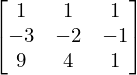

In [20]:
P = Matrix([[1,1,1],[-3,-2,-1],[9,4,1]])
P

A partir de la matriz de transformación se define un nuevo conjunto de variables de estado

$$x=P \cdot z$$


Al introducir la transformación a la ecuación del sistema se obtiene:


$$P \cdot \dot{z} = A \cdot P \cdot z + B \cdot u $$
$$y =  C \cdot P \cdot z +  D \cdot u $$



Como la ecuación de transición de estados debe definir las derivadas de las variables de estado, se cambia a:

$$\dot{z} = \overbrace{P^{-1} \cdot A \cdot P}^{A_1} \cdot z + \overbrace{P^{-1} \cdot B}^{B_1} \cdot u $$
$$y =  \underbrace{C \cdot P}_{C_1} \cdot z +  D \cdot u $$

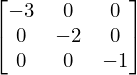

In [21]:
A1 = P.inv()*A*P
A1

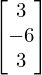

In [22]:
B1 = P.inv()*B
B1

In [23]:
C1 = C*P
C1

Así, el modelo original

$$\dot{X} = A \cdot X + B \cdot u $$
$$y =  C \cdot X +  D \cdot u $$

con

$$A = \left [ \matrix{0&1&0\\0&0&1\\-6&-11&-6} \right ]$$
$$B = \left [ \matrix{0\\0\\6} \right ]$$
$$C = \left [ \matrix{1&0&0} \right ]$$
$$D = 0$$

También puede representarse como:



$$\dot{Z} = A_1 \cdot Z + B_1 \cdot u $$
$$y =  C_1 \cdot Z +  D_1 \cdot u $$

con

$$A_1 = \left [ \matrix{-3&0&0\\0&-2&0\\0&0&-1} \right ]$$
$$B_1 = \left [ \matrix{3\\-6\\3} \right ]$$
$$C_1 = \left [ \matrix{1&1&1} \right ]$$
$$D_1 = 0$$

Compare la función de transferencia que se obtiene con cada modelo en espacio de estados

$$ C \cdot \left ( sI - A \right )^{-1} B  +  D$$


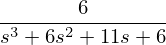

In [24]:
I = Matrix([[1,0,0],[0,1,0],[0,0,1]])
(C*(s*I-A).inv()*B + D)[0].simplify()

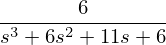

In [29]:
(C1*(s*I-A1).inv()*B1 + D)[0].simplify()

In [25]:
Gss = control.ss(A,B,C,D)
Gss

StateSpace(array([[  0.,   1.,   0.],
       [  0.,   0.,   1.],
       [ -6., -11.,  -6.]]), array([[0.],
       [0.],
       [6.]]), array([[1., 0., 0.]]), array([[0.]]))

In [26]:
Gss1 = control.ss(A1,B1,C1,D)
Gss1

StateSpace(array([[-3.,  0.,  0.],
       [ 0., -2.,  0.],
       [ 0.,  0., -1.]]), array([[ 3.],
       [-6.],
       [ 3.]]), array([[1., 1., 1.]]), array([[0.]]))

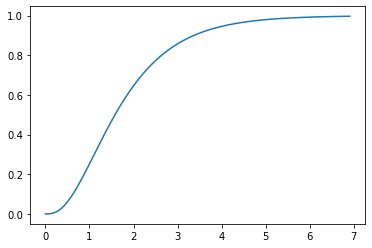

In [27]:
t,y = control.step_response(Gss)
plt.plot(t,y)

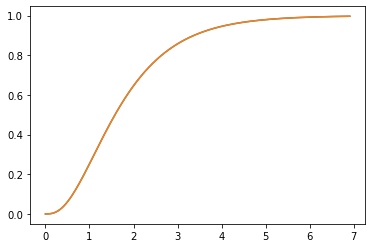

In [28]:
t1,y1 = control.step_response(Gss1)
t,y = control.step_response(Gss)
plt.plot(t,y,t1,y1)